This project analyst

In [13]:
import pandas as pd
import sqlite3

In [14]:
#Connecting sqlite3 to "factbook.db" database
conn = sqlite3.connect("factbook.db")
#Selecting information from database
q = "SELECT * FROM sqlite_master WHERE type='table';"
#displaying data with pandas and sql query
pd.read_sql_query(q, conn)

,type,name,tbl_name,rootpage,sql
0,table,facts,facts,2,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."
1,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"


In [15]:
#Query with data from 'facts' table in the database
facts = "SELECT * FROM facts LIMIT 5"
pd.read_sql_query(facts, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51,2015-11-01 13:19:49.461734,2015-11-01 13:19:49.461734
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30,2015-11-01 13:19:54.431082,2015-11-01 13:19:54.431082
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92,2015-11-01 13:19:59.961286,2015-11-01 13:19:59.961286
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00,2015-11-01 13:20:03.659945,2015-11-01 13:20:03.659945
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46,2015-11-01 13:20:08.625072,2015-11-01 13:20:08.625072


## Facts Table Statistics

In [16]:
#Querying MIN and MAX from population and population_growth columns from Facts table in the database
pop_stats = "SELECT MIN(population) min_pop, MAX(population) max_pop, MIN(population_growth) min_pop_growth, MAX(population_growth) max_pop_growth FROM facts"
pd.read_sql_query(pop_stats, conn)

,min_pop,max_pop,min_pop_growth,max_pop_growth
0,0,7256490011,0.0,4.02


There are populations with 0 habitants, and pop growth of 0

In [17]:
#Query returns country with population of 0
country0 = "SELECT name FROM facts WHERE population = 0"
pd.read_sql_query(country0, conn)

,name
0,Antarctica


In [18]:
#Query returns country with pop of 7256490011
country7256490011 = "SELECT name FROM facts WHERE population = 7256490011"
pd.read_sql_query(country7256490011, conn)

,name
0,World


* The query table shows that the country that has 0 habitants is Antarctica, and the country with pop of 7256490011 accounts for the whole world population 

## Plotting histogram without outlier data

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1c0d42e8>,
      dtype=object)

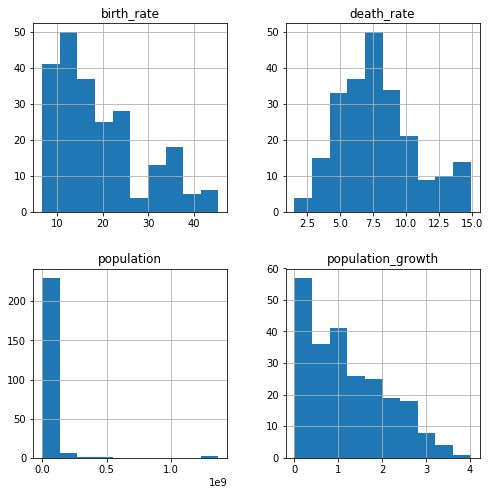

In [20]:
#Creating figure to plot graphs
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
#Query selects 4 columns: population, population_growth, birth_rate, death_rate
#Filters outlier data (Max and Min population)
no_outs = "SELECT population, population_growth, birth_rate, death_rate FROM facts WHERE population != (SELECT MIN(population) FROM facts) AND population != (SELECT MAX(population) FROM facts)"
pd.read_sql_query(no_outs, conn).hist(ax=ax)

## Population Density

In [24]:
pop_density = "SELECT name, population, area_land, (SELECT CAST(population as float)/CAST(area_land as float)) population_density FROM facts"
pd.read_sql_query(pop_density, conn).head()

,name,population,area_land,population_density
0,Afghanistan,32564342.0,652230.0,49.927697
1,Albania,3029278.0,27398.0,110.565662
2,Algeria,39542166.0,2381741.0,16.602211
3,Andorra,85580.0,468.0,182.863248
4,Angola,19625353.0,1246700.0,15.741841


In [36]:
#Highest pop density
pop_density_only = "SELECT name, (SELECT CAST(population as float)/CAST(area_land as float)) population_density FROM facts ORDER BY population_density DESC"
pd.read_sql_query(pop_density_only, conn).head()

,name,population_density
0,Macau,21168.964286
1,Monaco,15267.500000
2,Singapore,8259.784571
3,Hong Kong,6655.271202
4,Gaza Strip,5191.819444


In [43]:
#Lowest pop density
pop_density_only = "SELECT name, (SELECT CAST(population as float)/CAST(area_land as float)) population_density FROM facts WHERE population_density NOT NULL ORDER BY population_density ASC"
pd.read_sql_query(pop_density_only, conn).head()

,name,population_density
0,Antarctica,0.000000
1,Greenland,0.026653
2,Svalbard,0.030172
3,Falkland Islands (Islas Malvinas),0.276103
4,Pitcairn Islands,1.021277


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1cedd3c8>],
      dtype=object)

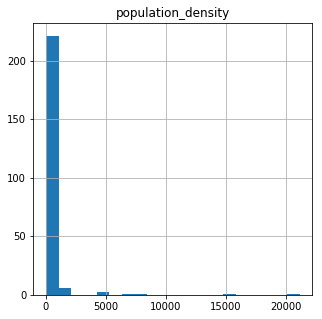

In [45]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
pop_density_only = "SELECT (SELECT CAST(population as float)/CAST(area_land as float)) population_density FROM facts WHERE population_density NOT NULL"
pd.read_sql_query(pop_density_only, conn).hist(ax=ax, bins=20)

Population Density shows that for the majority of countries, theres an even relationship between population and area_land.
* The country with the highest population density is Macau, as this country is considered an active economic market at the south of China. The country is very small, yet it congregates big populations of people
* Antartica and Greenland, in the other side, show very low population density, as these countries are vast in area, yet not many people live in these areas.